In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [2]:
data = pd.read_csv('clean_data_p1.csv')
data

,Make,Car_Name,CC_Capacity,Horsepower,Top_Speed_kmh,Acceleration_0_100_sec,Price_USD,Seats,Torque_Nm,Engine_Layout,Fuel_Type_Cleaned
0,FERRARI,Sf90 Stradale,3990.0,963.0,340.0,2.5,1.100000e+06,2,800.0,V-type,Hybrid
1,ROLLS ROYCE,Phantom,6749.0,563.0,250.0,5.3,4.600000e+05,5,900.0,V-type,Petrol
2,FORD,Ka+,1200.0,77.5,165.0,10.5,1.350000e+04,5,120.0,Inline,Petrol
3,MERCEDES,Gt 63 S,3982.0,630.0,250.0,3.2,1.610000e+05,4,900.0,V-type,Petrol
4,AUDI,Audi R8 Gt,5204.0,602.0,320.0,3.6,2.532900e+05,2,560.0,V-type,Petrol
...,...,...,...,...,...,...,...,...,...,...,...
1208,TOYOTA,Crown Signia,2487.0,240.0,180.0,7.6,4.359048e+09,5,239.0,Hybrid (ICE+Electric),Hybrid
1209,TOYOTA,4Runner (6Th Gen),2393.0,326.0,180.0,6.8,5.000000e+04,7,630.0,Hybrid (ICE+Electric),Hybrid
1210,TOYOTA,Corolla Cross,1987.0,169196.0,190.0,NaN,2.521029e+09,5,190210.0,Hybrid (ICE+Electric),Hybrid
1211,TOYOTA,C-Hr+,NaN,140198.0,180.0,NaN,3.300000e+04,5,190205.0,Hybrid (ICE+Electric),Hybrid


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1213 entries, 0 to 1212
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Make                    1213 non-null   object 
 1   Car_Name                1213 non-null   object 
 2   CC_Capacity             1082 non-null   float64
 3   Horsepower              1213 non-null   float64
 4   Top_Speed_kmh           1213 non-null   float64
 5   Acceleration_0_100_sec  1198 non-null   float64
 6   Price_USD               1212 non-null   float64
 7   Seats                   1213 non-null   int64  
 8   Torque_Nm               1212 non-null   float64
 9   Engine_Layout           1213 non-null   object 
 10  Fuel_Type_Cleaned       1213 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 104.4+ KB


In [4]:
data.describe()

,CC_Capacity,Horsepower,Top_Speed_kmh,Acceleration_0_100_sec,Price_USD,Seats,Torque_Nm
count,1082.000000,1213.000000,1213.000000,1198.000000,1.212000e+03,1213.000000,1212.000000
mean,3016.797597,1072.016488,216.624073,7.566861,1.274576e+07,5.329761,1738.260726
std,1836.777382,11913.403265,53.056640,3.325846,2.295682e+08,8.938555,16937.145753
min,360.000000,26.000000,80.000000,1.900000,4.000000e+03,1.000000,45.000000
25%,1600.000000,155.000000,180.000000,5.200000,2.800000e+04,4.000000,250.000000
50%,2483.500000,255.500000,200.000000,7.100000,4.300000e+04,5.000000,380.000000
75%,3745.000000,400.000000,250.000000,9.500000,7.112625e+04,5.000000,565.000000
max,16100.000000,250340.000000,500.000000,35.000000,5.500065e+09,215.000000,365480.000000


## Check missing value

In [5]:
(data.isnull().sum()/ len(data)) * 100

Make                       0.000000
Car_Name                   0.000000
CC_Capacity               10.799670
Horsepower                 0.000000
Top_Speed_kmh              0.000000
Acceleration_0_100_sec     1.236603
Price_USD                  0.082440
Seats                      0.000000
Torque_Nm                  0.082440
Engine_Layout              0.000000
Fuel_Type_Cleaned          0.000000
dtype: float64

#### The percentage of mising values for the columns CC_Capacity and Accleration is 10.8% and 1.23% respectively

## Clarify feature


### Quantitative Classification and Qualitatice classification

In [6]:
data.describe()

,CC_Capacity,Horsepower,Top_Speed_kmh,Acceleration_0_100_sec,Price_USD,Seats,Torque_Nm
count,1082.000000,1213.000000,1213.000000,1198.000000,1.212000e+03,1213.000000,1212.000000
mean,3016.797597,1072.016488,216.624073,7.566861,1.274576e+07,5.329761,1738.260726
std,1836.777382,11913.403265,53.056640,3.325846,2.295682e+08,8.938555,16937.145753
min,360.000000,26.000000,80.000000,1.900000,4.000000e+03,1.000000,45.000000
25%,1600.000000,155.000000,180.000000,5.200000,2.800000e+04,4.000000,250.000000
50%,2483.500000,255.500000,200.000000,7.100000,4.300000e+04,5.000000,380.000000
75%,3745.000000,400.000000,250.000000,9.500000,7.112625e+04,5.000000,565.000000
max,16100.000000,250340.000000,500.000000,35.000000,5.500065e+09,215.000000,365480.000000


In [11]:
#Note:
"""
ghế ngồi có vấn đề: thông thường xe phải trên dưới 2 chỗ ngồi, không thể tới tận 215 chỗ
mã lực: có vài vấn đề. Min thì là 26hp, nhưng max tới tận 250340hp. có thể do nhập liệu sai
tương tự với torque ( mô men xoắn)
giá xe ô tô có vấn đề: khi siêu xe mới hiện tại cũng chỉ 30 triệu đô nhưng xe max thì tới tận 550 triệu USD
cột Top_speed_km/h có vẻ khá là đúng, phù hợp với thực tế
cột cc_capacity có khả năng outlier ( vì dung tích tận 16 lít, quá cao so với xe phổ thông. Chỉ dành cho xe container)

    
    
"""

'\nghế ngồi có vấn đề: thông thường xe phải trên dưới 2 chỗ ngồi, không thể tới tận 215 chỗ\nmã lực: có vài vấn đề. Min thì là 26hp, nhưng max tới tận 250340hp. có thể do nhập liệu sai\ntương tự với torque ( mô men xoắn)\ngiá xe ô tô có vấn đề: khi siêu xe mới hiện tại cũng chỉ 30 triệu đô nhưng xe max thì tới tận 550 triệu USD\ncột Top_speed_km/h có vẻ khá là đúng, phù hợp với thực tế\ncột cc_capacity có khả năng outlier ( vì dung tích tận 16 lít, quá cao so với xe phổ thông. Chỉ dành cho xe container)\n\n    \n    \n'

In [7]:

quantitative_columns = []
qualitative_columns = []
for col in data:
    if data[col].dtype == 'float64' or data[col].dtype == 'int64':
        quantitative_columns.append(col) # ratio hết
    else:
        qualitative_columns.append(col) # này là dạng nominal hết
        

In [8]:
print(qualitative_columns) 

['Make', 'Car_Name', 'Engine_Layout', 'Fuel_Type_Cleaned']


In [9]:
print(quantitative_columns)

['CC_Capacity', 'Horsepower', 'Top_Speed_kmh', 'Acceleration_0_100_sec', 'Price_USD', 'Seats', 'Torque_Nm']


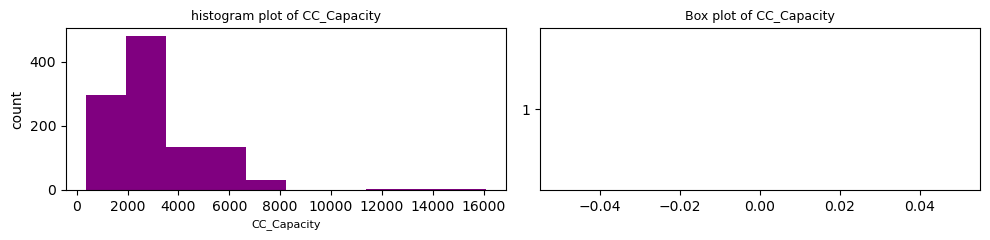

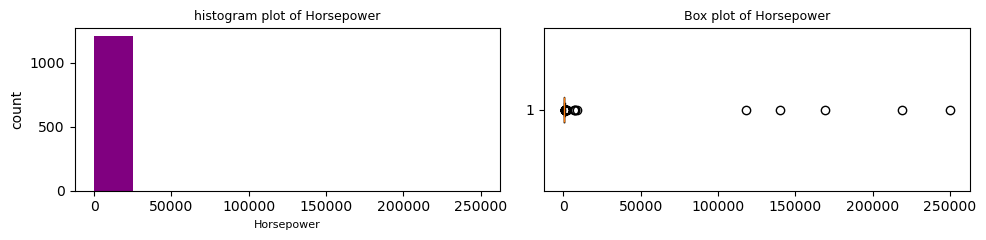

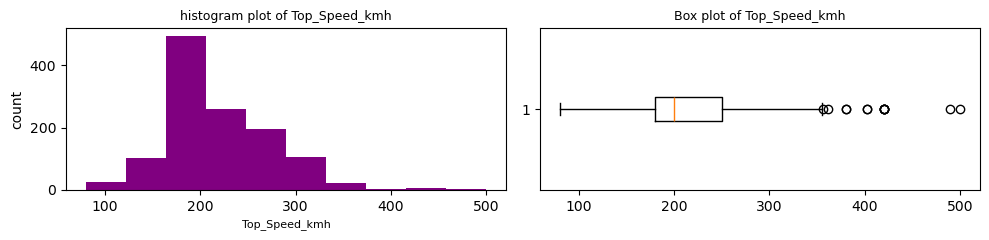

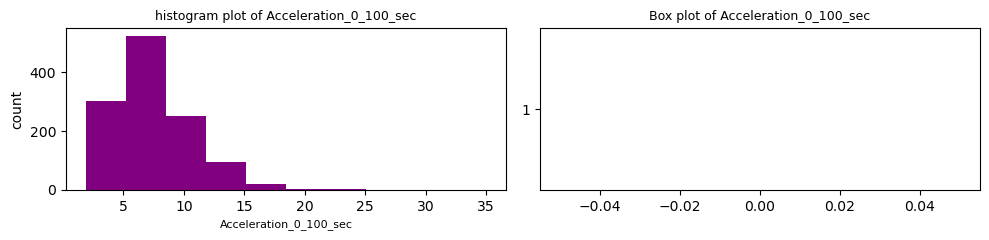

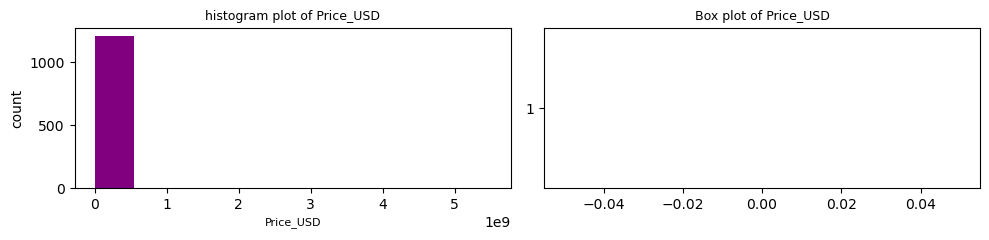

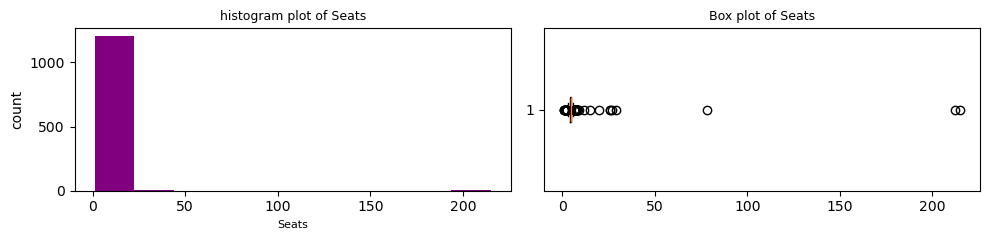

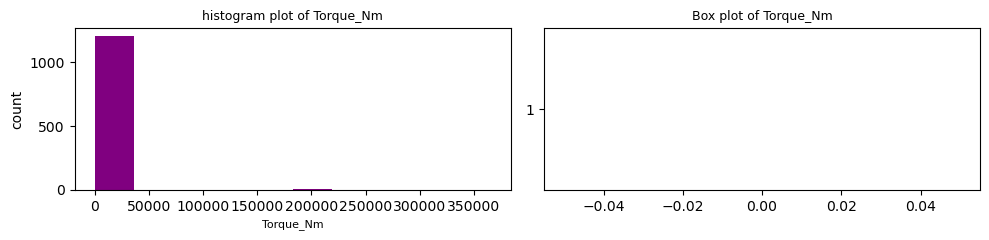

In [10]:
for col in quantitative_columns:
    plt.figure(figsize= (10, 2.5))
    #histogram plot:
    plt.subplot(1, 2, 1) 
    plt.hist(data[col], color = "purple")
    plt.title(f"histogram plot of {col}", fontsize = 9)
    plt.xlabel(col, fontsize = 8)
    plt.ylabel("count")

    #box plot
    plt.subplot(1,2, 2)
    plt.boxplot(x = data[col], vert = False)
    plt.title(f"Box plot of {col}", fontsize = 9)
    plt.tight_layout()
    plt.show()

In [124]:
## 1. Kiểm tra và xử lý Missing Values

### Explore outlier 

In [11]:
def find_iqr_outliers(df, col):
    q1 = df[col].quantile(0.25)
    q2 = df[col].quantile(0.5)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
    print(f"(Lower Bound): {lower_bound:,.2f}")
    print(f"(Upper Bound): {upper_bound:,.2f}")
    print(f" Outlier : {len(outliers)}")
    print(f'percent on columns: {len(outliers)/ len(data[col])}')
    print("------------------------------------------")
    return [outliers, q1, q2, q3]
    

In [12]:
def iqr_outliers_method(df, col):
    q1 = df[col].quantile(0.25)
    q2 = df[col].quantile(0.5)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    return [lower_bound, upper_bound]

In [13]:
for col in quantitative_columns:
    print(f"{col} info:")
    outlier = find_iqr_outliers(data, col)
    print()
    

CC_Capacity info:
(Lower Bound): -1,617.50
(Upper Bound): 6,962.50
 Outlier : 20
percent on columns: 0.016488046166529265
------------------------------------------

Horsepower info:
(Lower Bound): -212.50
(Upper Bound): 767.50
 Outlier : 39
percent on columns: 0.03215169002473207
------------------------------------------

Top_Speed_kmh info:
(Lower Bound): 75.00
(Upper Bound): 355.00
 Outlier : 13
percent on columns: 0.010717230008244023
------------------------------------------

Acceleration_0_100_sec info:
(Lower Bound): -1.25
(Upper Bound): 15.95
 Outlier : 23
percent on columns: 0.018961253091508656
------------------------------------------

Price_USD info:
(Lower Bound): -36,689.38
(Upper Bound): 135,815.62
 Outlier : 151
percent on columns: 0.12448474855729597
------------------------------------------

Seats info:
(Lower Bound): 2.50
(Upper Bound): 6.50
 Outlier : 325
percent on columns: 0.2679307502061006
------------------------------------------

Torque_Nm info:
(Lower Bo

## fix Horsepower

In [14]:
filer_Horsepower = data["Horsepower"] >= 50000
print(data.loc[filer_Horsepower])
# lệch 1000 đơn vị do bị nhập lệch

                   Make        Car_Name  CC_Capacity  Horsepower  Top_Speed_kmh  Acceleration_0_100_sec     Price_USD  Seats  Torque_Nm          Engine_Layout Fuel_Type_Cleaned
646         TATA MOTORS           Nexon       1199.0    118110.0          180.0                    10.0  1.400000e+04      5      215.0                 Inline        Mixed Fuel
901   JAGUAR LAND ROVER   Jaguar F-Pace       1999.0    250340.0          230.0                     7.2  5.500065e+09      5   365480.0                 V-type            Petrol
1210             TOYOTA   Corolla Cross       1987.0    169196.0          190.0                     NaN  2.521029e+09      5   190210.0  Hybrid (ICE+Electric)            Hybrid
1211             TOYOTA           C-Hr+          NaN    140198.0          180.0                     NaN  3.300000e+04      5   190205.0  Hybrid (ICE+Electric)            Hybrid
1212             TOYOTA  Rav4 (6Th Gen)       2487.0    219302.0          200.0                     NaN  2.900043e+

In [15]:
data.loc[filer_Horsepower, 'Horsepower'] = data.loc[filer_Horsepower, 'Horsepower'] / 1000

In [16]:
data.describe()
#ktra thì vẫn còn lỗi nhập liệu (thông thường horsepower < 3000). Trên 3000 là vô lí nên sửa

,CC_Capacity,Horsepower,Top_Speed_kmh,Acceleration_0_100_sec,Price_USD,Seats,Torque_Nm
count,1082.000000,1213.000000,1213.000000,1198.000000,1.212000e+03,1213.000000,1212.000000
mean,3016.797597,333.146864,216.624073,7.566861,1.274576e+07,5.329761,1738.260726
std,1836.777382,481.927066,53.056640,3.325846,2.295682e+08,8.938555,16937.145753
min,360.000000,26.000000,80.000000,1.900000,4.000000e+03,1.000000,45.000000
25%,1600.000000,155.000000,180.000000,5.200000,2.800000e+04,4.000000,250.000000
50%,2483.500000,255.000000,200.000000,7.100000,4.300000e+04,5.000000,380.000000
75%,3745.000000,400.000000,250.000000,9.500000,7.112625e+04,5.000000,565.000000
max,16100.000000,8689.000000,500.000000,35.000000,5.500065e+09,215.000000,365480.000000


In [17]:
filer_outlier_hp_severe = data["Horsepower"] > 3000
print(data.loc[filer_outlier_hp_severe])

            Make       Car_Name  CC_Capacity  Horsepower  Top_Speed_kmh  Acceleration_0_100_sec  Price_USD  Seats  Torque_Nm Engine_Layout Fuel_Type_Cleaned
628  TATA MOTORS         Altroz       1199.0      8689.0          170.0                    12.0    10400.0      5      156.5        V-type        Mixed Fuel
638  TATA MOTORS           Zest       1248.0      7590.0          165.0                    15.0     8700.0      5   190140.0        V-type        Mixed Fuel
641  TATA MOTORS  Indigo Marina       1396.0      7085.0          150.0                    17.0     8300.0      5   135115.0        Inline        Mixed Fuel
642  TATA MOTORS          Manza       1248.0      7590.0          160.0                    14.0     9000.0      5   200115.0        Inline        Mixed Fuel


In [18]:
data.loc[filer_outlier_hp_severe, 'Horsepower'] = data.loc[filer_outlier_hp_severe, 'Horsepower'] / 100

In [19]:
#check data lệch 1000 đơn vị đã sửa ( lần 2)
data.iloc[[628, 638, 641, 642]]

,Make,Car_Name,CC_Capacity,Horsepower,Top_Speed_kmh,Acceleration_0_100_sec,Price_USD,Seats,Torque_Nm,Engine_Layout,Fuel_Type_Cleaned
628,TATA MOTORS,Altroz,1199.0,86.89,170.0,12.0,10400.0,5,156.5,V-type,Mixed Fuel
638,TATA MOTORS,Zest,1248.0,75.90,165.0,15.0,8700.0,5,190140.0,V-type,Mixed Fuel
641,TATA MOTORS,Indigo Marina,1396.0,70.85,150.0,17.0,8300.0,5,135115.0,Inline,Mixed Fuel
642,TATA MOTORS,Manza,1248.0,75.90,160.0,14.0,9000.0,5,200115.0,Inline,Mixed Fuel


In [58]:
data.describe()

,CC_Capacity,Horsepower,Top_Speed_kmh,Acceleration_0_100_sec,Price_USD,Seats,Torque_Nm
count,1082.000000,1213.000000,1213.000000,1198.000000,1.212000e+03,1213.000000,1212.000000
mean,3016.797597,307.883500,216.624073,7.566861,1.274576e+07,5.329761,1738.260726
std,1836.777382,222.955424,53.056640,3.325846,2.295682e+08,8.938555,16937.145753
min,360.000000,26.000000,80.000000,1.900000,4.000000e+03,1.000000,45.000000
25%,1600.000000,153.000000,180.000000,5.200000,2.800000e+04,4.000000,250.000000
50%,2483.500000,255.000000,200.000000,7.100000,4.300000e+04,5.000000,380.000000
75%,3745.000000,400.000000,250.000000,9.500000,7.112625e+04,5.000000,565.000000
max,16100.000000,2488.000000,500.000000,35.000000,5.500065e+09,215.000000,365480.000000


## FIX torque_Nm

In [20]:
#list error input( horsepower and torque_Nm)
list_error_input  = [638, 641, 642, 901, 1210, 1211, 1212]
data.iloc[list_error_input]

,Make,Car_Name,CC_Capacity,Horsepower,Top_Speed_kmh,Acceleration_0_100_sec,Price_USD,Seats,Torque_Nm,Engine_Layout,Fuel_Type_Cleaned
638,TATA MOTORS,Zest,1248.0,75.900,165.0,15.0,8.700000e+03,5,190140.0,V-type,Mixed Fuel
641,TATA MOTORS,Indigo Marina,1396.0,70.850,150.0,17.0,8.300000e+03,5,135115.0,Inline,Mixed Fuel
642,TATA MOTORS,Manza,1248.0,75.900,160.0,14.0,9.000000e+03,5,200115.0,Inline,Mixed Fuel
901,JAGUAR LAND ROVER,Jaguar F-Pace,1999.0,250.340,230.0,7.2,5.500065e+09,5,365480.0,V-type,Petrol
1210,TOYOTA,Corolla Cross,1987.0,169.196,190.0,NaN,2.521029e+09,5,190210.0,Hybrid (ICE+Electric),Hybrid
1211,TOYOTA,C-Hr+,NaN,140.198,180.0,NaN,3.300000e+04,5,190205.0,Hybrid (ICE+Electric),Hybrid
1212,TOYOTA,Rav4 (6Th Gen),2487.0,219.302,200.0,NaN,2.900043e+09,5,221400.0,Hybrid (ICE+Electric),Hybrid


In [21]:
#fix data torque_Nm
condition_to_filter = data.index.isin(list_error_input)
data.loc[condition_to_filter, 'Torque_Nm'] = data.loc[condition_to_filter, 'Torque_Nm'] / 1000

In [22]:
print(data.loc[condition_to_filter])
data.describe()

                   Make        Car_Name  CC_Capacity  Horsepower  Top_Speed_kmh  Acceleration_0_100_sec     Price_USD  Seats  Torque_Nm          Engine_Layout Fuel_Type_Cleaned
638         TATA MOTORS            Zest       1248.0      75.900          165.0                    15.0  8.700000e+03      5    190.140                 V-type        Mixed Fuel
641         TATA MOTORS   Indigo Marina       1396.0      70.850          150.0                    17.0  8.300000e+03      5    135.115                 Inline        Mixed Fuel
642         TATA MOTORS           Manza       1248.0      75.900          160.0                    14.0  9.000000e+03      5    200.115                 Inline        Mixed Fuel
901   JAGUAR LAND ROVER   Jaguar F-Pace       1999.0     250.340          230.0                     7.2  5.500065e+09      5    365.480                 V-type            Petrol
1210             TOYOTA   Corolla Cross       1987.0     169.196          190.0                     NaN  2.521029e+

,CC_Capacity,Horsepower,Top_Speed_kmh,Acceleration_0_100_sec,Price_USD,Seats,Torque_Nm
count,1082.000000,1213.000000,1213.000000,1198.000000,1.212000e+03,1213.000000,1212.000000
mean,3016.797597,307.883500,216.624073,7.566861,1.274576e+07,5.329761,507.920516
std,1836.777382,222.955424,53.056640,3.325846,2.295682e+08,8.938555,1051.499514
min,360.000000,26.000000,80.000000,1.900000,4.000000e+03,1.000000,45.000000
25%,1600.000000,153.000000,180.000000,5.200000,2.800000e+04,4.000000,250.000000
50%,2483.500000,255.000000,200.000000,7.100000,4.300000e+04,5.000000,370.000000
75%,3745.000000,400.000000,250.000000,9.500000,7.112625e+04,5.000000,560.000000
max,16100.000000,2488.000000,500.000000,35.000000,5.500065e+09,215.000000,15590.000000


In [23]:
#sau khi xử lí, đã loại bỏ những lỗi như sai dơn vị xe(từ 221400 về lại 15000) Hoàn toàn hợp lí

In [24]:
#xử lí xe ô tô chỗ ngồi (vì xe ô tô đối tượng nghiên cứu chỉ cần 8 chỗ nên sẽ remove hết những xe trên 8 chỗ(xe buýt, chỗ lên))
#tổng có 11 xe trên 8 chỗ( đa phần là outlier, lỗi nhập liệu) ( từ 20 đến 215 chỗ ngồi)

## Fix seats

In [25]:
data = data.loc[data['Seats'] <= 8]

## Fix CC_capacity

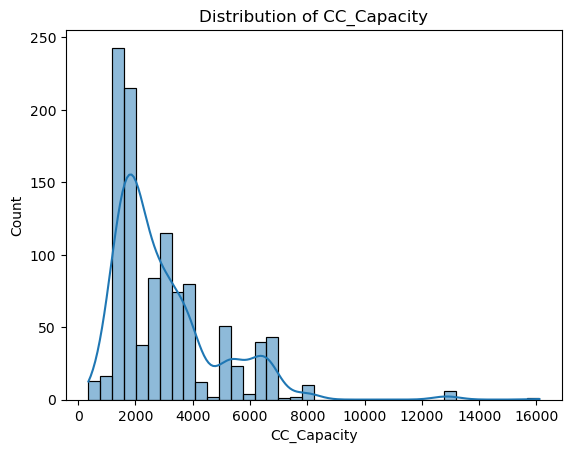

Mean: 3011.5041938490212
Median: 2480.0


In [26]:
sns.histplot(data['CC_Capacity'], kde=True)
plt.title("Distribution of CC_Capacity")
plt.show()

print("Mean:", data['CC_Capacity'].mean())
print("Median:", data['CC_Capacity'].median())

In [28]:
#vì hầu hết data của capacity ở dưới 8000 và thông thường xe nằm quanh giá trị 1000- 3000. Nên loại bỏ những outliers này
data = data.loc[data['CC_Capacity'] <= 8000]

In [30]:
#Fillna capacity after filter capacity <8000 cc
median_capacity = data['CC_Capacity'].median()
data['CC_Capacity'] = data['CC_Capacity'].fillna(median_capacity)


In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1066 entries, 0 to 1212
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Make                    1066 non-null   object 
 1   Car_Name                1066 non-null   object 
 2   CC_Capacity             1066 non-null   float64
 3   Horsepower              1066 non-null   float64
 4   Top_Speed_kmh           1066 non-null   float64
 5   Acceleration_0_100_sec  1061 non-null   float64
 6   Price_USD               1066 non-null   float64
 7   Seats                   1066 non-null   int64  
 8   Torque_Nm               1066 non-null   float64
 9   Engine_Layout           1066 non-null   object 
 10  Fuel_Type_Cleaned       1066 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 99.9+ KB


## Fix price_USD

In [ ]:
# vẫn giữ các outlier các xe trên dưới 5 triệu đô
#chỉ loại những xe trên 5 triệu vì dữ liệu cho thấy 4 chiếc xe trên 200 tr(khả năng cao là do nhập liệu sai nên loại bỏ)
filter_USD = data["Price_USD"] <= 5000000
data = data.loc[filter_USD, :]

In [33]:
print(data.describe())

       CC_Capacity   Horsepower  Top_Speed_kmh  Acceleration_0_100_sec     Price_USD        Seats    Torque_Nm
count  1058.000000  1058.000000    1058.000000             1055.000000  1.058000e+03  1058.000000  1058.000000
mean   2932.405482   293.426418     219.757089                7.667204  1.125740e+05     4.845936   411.143544
std    1620.473900   200.027266      51.949821                3.300196  3.754882e+05     1.416181   231.845022
min     360.000000    26.000000      80.000000                2.200000  4.000000e+03     1.000000    45.000000
25%    1600.000000   150.000000     180.000000                5.500000  2.720000e+04     4.000000   250.000000
50%    2480.000000   248.000000     210.000000                7.300000  4.129250e+04     5.000000   366.000000
75%    3672.000000   382.000000     250.000000                9.500000  6.990000e+04     5.000000   530.000000
max    7993.000000  1850.000000     500.000000               35.000000  5.000000e+06     8.000000  1600.000000


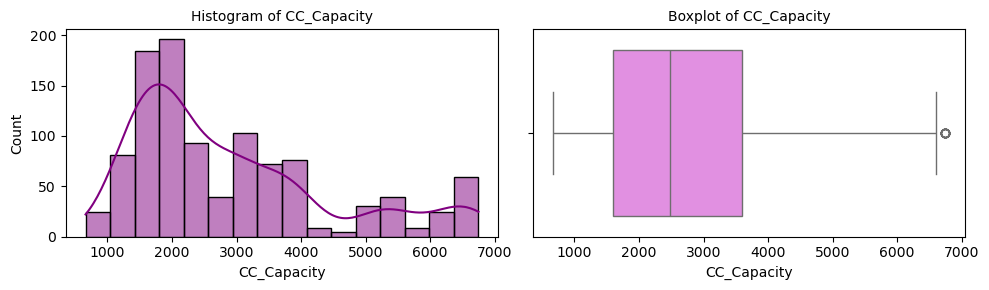

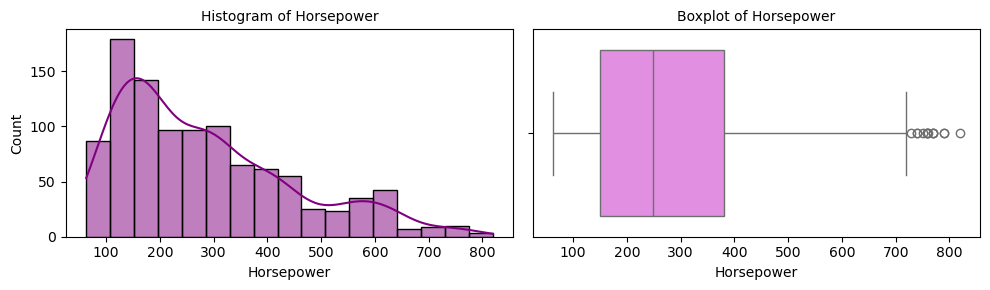

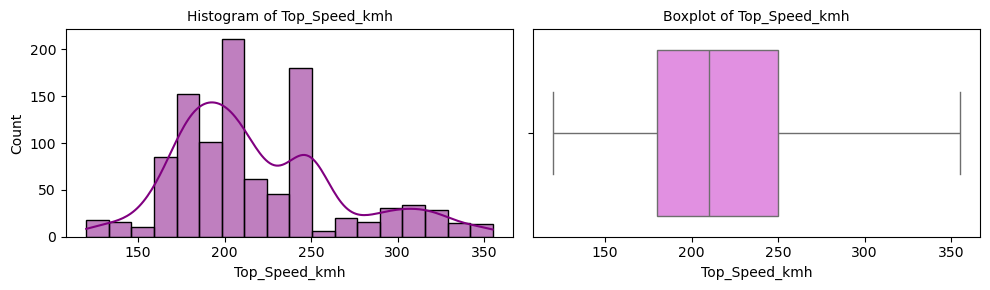

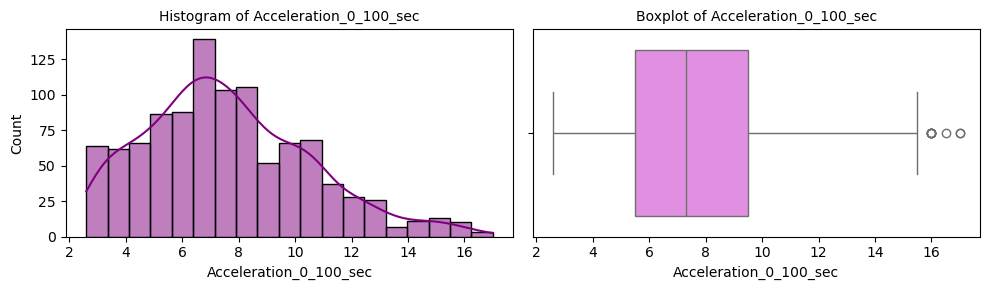

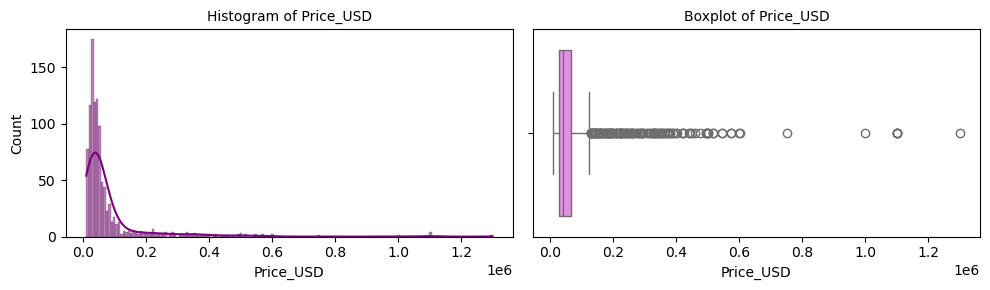

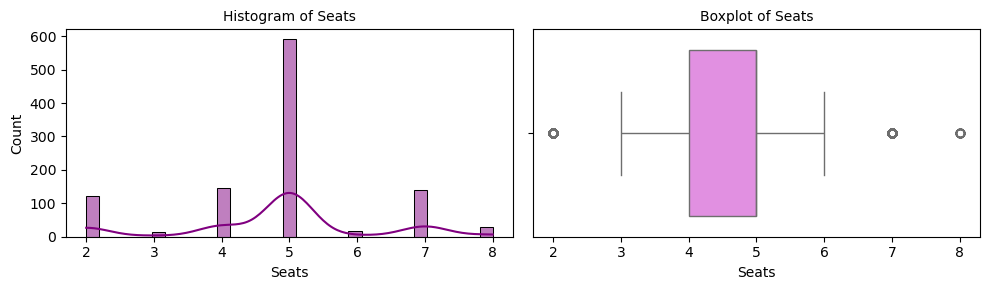

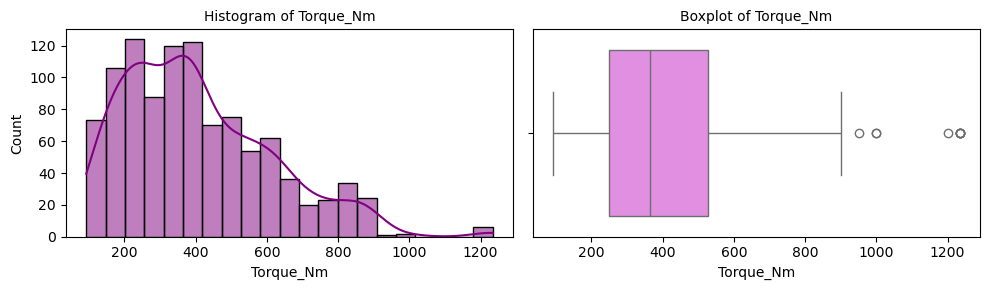

In [35]:
# vẽ box và his của quatitive trên mỗi column bằng seaborn ( loại bỏ 1%^ outlier ngoài biên)
for col in quantitative_columns:
    plt.figure(figsize=(10, 3))
    
    # Cắt 1% đầu và 1% cuối để loại bỏ outliers quá mạnh
    lower, upper = np.percentile(data[col].dropna(), [1, 99])
    filtered = data[(data[col] >= lower) & (data[col] <= upper)]

    plt.subplot(1, 2, 1)
    sns.histplot(filtered, x=col, kde=True, color="purple")
    plt.title(f"Histogram of {col}", fontsize=10)


    plt.subplot(1, 2, 2)
    sns.boxplot(x=filtered[col], color="violet")
    plt.title(f"Boxplot of {col}", fontsize=10)
    
    plt.tight_layout()
    plt.show()

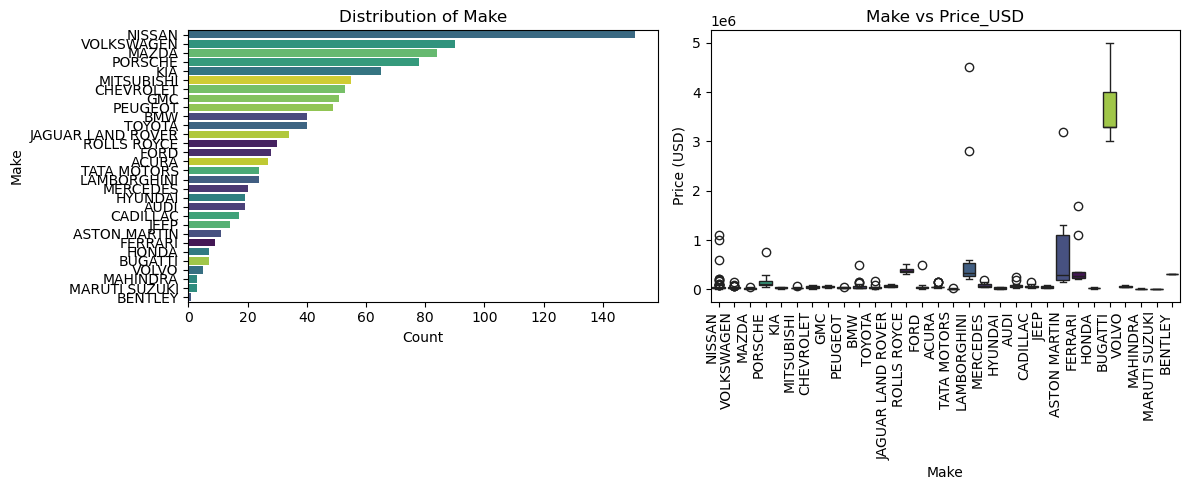

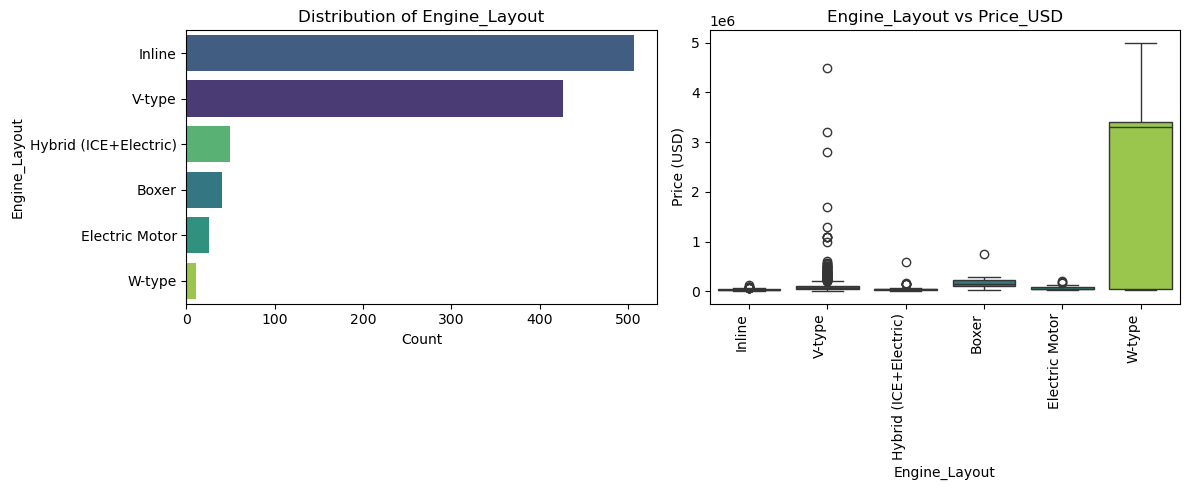

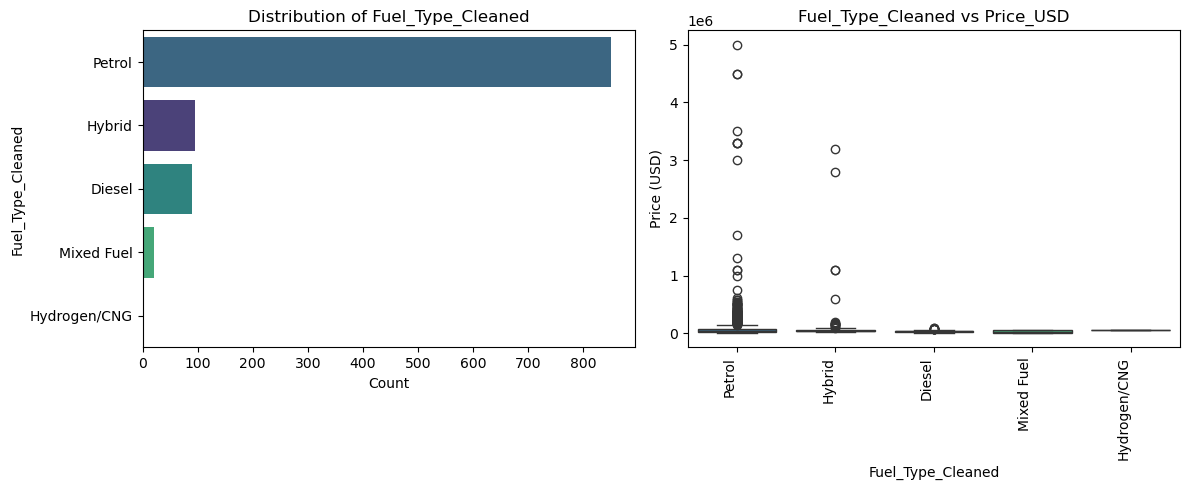

In [ ]:
cols_to_plot = ['Make', 'Engine_Layout', 'Fuel_Type_Cleaned']

for col in cols_to_plot:
    plt.figure(figsize=(12, 5))

    # Biểu đồ count
    plt.subplot(1, 2, 1)
    sns.countplot(y=col, data=data, order=data[col].value_counts().index,
                  hue=col, legend=False, palette="viridis")
    plt.title(f"Distribution of {col}")
    plt.xlabel("Count")
    plt.ylabel(col)

    # Boxplot khi so sánh với giá
    plt.subplot(1, 2, 2)
    sns.boxplot(x=col, y="Price_USD", data=data, 
                order=data[col].value_counts().index, 
                hue=col, legend=False, palette="viridis")
    plt.title(f"{col} vs Price_USD")
    plt.ylabel("Price (USD)")
    plt.xlabel(col)
    plt.xticks(rotation=90, ha='right')

    plt.tight_layout()
    plt.show()